# **TOPIC 1 ✈ Bias-Variance Tradeoff** 

## **Introduction:**

We have seen that increasing the number of features improves the performance of the model.

BUT !

Increasing the number of features also increases the complexity of the model.

Agree? ☹

Increasing complexity in search of better performance leads to bias-variance tradeoff.

# **Bias - Underfitting:**

* Bias just means unbalance/unfair.

* Remember these phrases.

    BU - VO (Bias underfit - Variance underfit)

    Bias is too basic, does underfitting. Variance goes wild, overfitting like a child.

* Bias means data is not even understanding training data bro. It is not even able to generalize training data. Forget about the test data. Ugh!

* **Bias doens't Bother** to trick at all. It gives bad performance on both. 

* It is easier to catch underfitting - High Bias and low variance

Because it is neither performing good on training data nor on test data.

*  High bias occurs when a model is too simple and model becomes extra relax :/

# **Variance - Overfitting:**

* Variance itself means variability. 

* It means it sees all the variability while training and memorize them. It is stupid enough! It thinks that I will memorize all the data and will perform good on test data.

But!

It performs worse on test data. It tries to become **over smart** :/ by performing best on training data. Sometimes, it gives 0 error for the training data.

But for testing!!!!

It explodes. It performs worse. 

*  High variance occurs when a model is too complex and model tries to become oversmart during training :/

So bias-variance tradeoff is important. Both should be balance enough.

But how do we know how much complexity should we keep of model so we don't get high bias nor higher variance?????



# **Choosing level of Complexity - Choosing degree of Polynomial**

We can't say one number that would make bias-variance tradeoff for us. Because we have different context, different datasets, and different models.

We must have to test on our dataset by running a loop. and in the end, see at which number (degree) model is performing better and choose that for that model.

**Steps:**

1. Choose how many degrees you wanna check.

2. Compute polynomial features and fit them to dataset. Make predictions.

3. Check the training and testing error and add it to lists.

4. Increase the degree by one number and now move again to step 2 until you reach at end.

5. Make plot of error lists and select best degree.

# **-------------------------Coding-----------------------------------**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('/content/sample_data/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
training_error_rmse = []
test_error_rmse = []

In [12]:
X = df.drop('sales', axis=1)
y = df['sales']

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# we will check the performance of model from degree 1 - 10

for d in range(1,10):
  poly_converter = PolynomialFeatures(degree = d, include_bias = False)
  new_features = poly_converter.fit_transform(X)

  model = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(new_features, y, test_size = 0.33, random_state = 101)
  model.fit(X_train, y_train)
  predictions_train = model.predict(X_train)
  predictions_test = model.predict(X_test)

  train_error = np.sqrt(mean_squared_error(predictions_train, y_train))
  test_error = np.sqrt(mean_squared_error(predictions_test, y_test))

  training_error_rmse.append(train_error)
  test_error_rmse.append(test_error)

In [14]:
training_error_rmse

[1.737651598244771,
 0.5947926597019145,
 0.4405973423236363,
 0.35329132820381115,
 0.24845371817879838,
 0.18843487158569092,
 4.814439453639714,
 0.1538048452385793,
 0.14899332346840982]

For training it is performing superb! But at degree = 7, it suddenly reached from 0.18 to 4.81 which is weird.

In [15]:
test_error_rmse

[1.5324409426512418,
 0.6482912032533561,
 0.5577254823366882,
 0.5064297301182455,
 2.3573652717523426,
 11.248113658553617,
 1207.856965907024,
 2457.841910858816,
 166828.89058328964]

Woof! The test error exploded after degree = 4. 

Let's plot these to better get the idea.

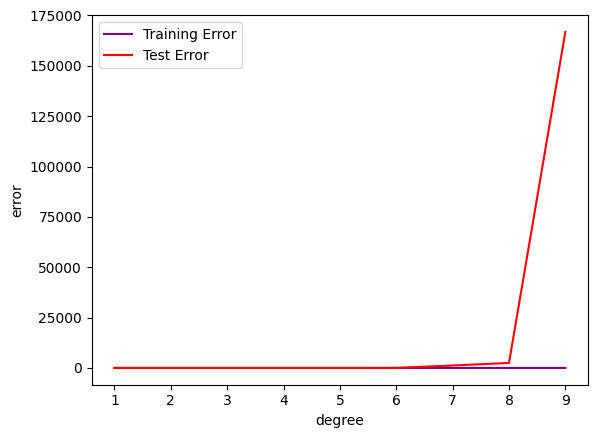

In [19]:
plt.plot(range(1,10), training_error_rmse, label = 'Training Error', color = 'purple')
plt.plot(range(1,10), test_error_rmse, label = 'Test Error', color = 'red')

plt.legend()
plt.xlabel('degree')
plt.ylabel('error');

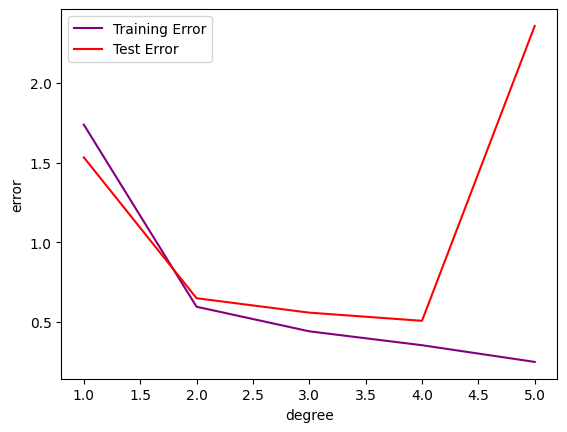

In [20]:
# Make it more closer look by plotting 5 as we have seen that it have training performed worse at 4th

plt.plot(range(1,6), training_error_rmse[:5], label = 'Training Error', color = 'purple')
plt.plot(range(1,6), test_error_rmse[:5], label = 'Test Error', color = 'red')

plt.legend()
plt.xlabel('degree')
plt.ylabel('error');

It means at degree 4 the test exploded. So to be safe, we can say degree 3 is optimal degree/level of complexity for our this model. Dont look at how good training error is performing because it rather shows overfitting -_- So just look at test error curve and decide optimal degree.


# **TOPIC 2 ✈ Feature Scaling** 

## **Motivation:**

* If we have features that are having different scales (units) and we try something like gradient descent on them to optimize (beta) coefficients. 

* Suppose some features are in KG and some in G. The weights with KG unit will take longer to update than those features which are in grams.

* Due to this fact, gradient descent will take forever to converge (to reach at required point/minimum beta value for that feature). 

**Solution:**

Make all features in the same scale (unit) / range.

* So we can say that feature scaling is critical when using gradient descent. What if we are using algorithm that does'nt optimize beta coefficients with gradient descent? Then????

* There are many algorithms where scaling won't have an effect e.g. decision trees or random forest etc. They don't need gradient descent so that don't need feature scaling too.

* But feature scaling doesn't harm your data. Do it or not. Upto you. Because it make the feature (beta) coefficients comparable to each other. 



## **Two Main Ways of Feature Scaling:**

### **1. Standardization:**

* It rescales data to have 0 means (µ) and 1 standard deviation (σ). 

* Formula: 

  X_changed = (X - µ) /σ

Complete mean and SD of complete feature and do this formula for **complete feature.** all at once. Not row by row.

* Standardization is also called 'Z-score Normalization'.

### **2. Normalization:**

* It rescales data to be between 0 and 1. 

* Formula: 

  $X_{\text{changed}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$


Find minimum and maximum value of feature and subtract each value one by one from these and perform normalization.



Method:

1. A .fit() method calculates the mean, SD, X_min etc. all the necessary statistical values.

2. A .transform() method will convert all features to rescaled features using calculated statitical values.

*(We can seen the same thing in polynomial features calculation too.)*

**Nota Bene:**

Let me tell you a thing. 

What if I transform the training data and model gets trained on those transformed value.

Now when you will do testing, then will you do that on raw data which is not scaled? Your model will fail totally.. Common sense!

But oh! Theres some issue. 

If you will calculate all the SD and X_min etc of the testing data, then your model will cheat and will remember them. :////

We dont want our model to see our testing data. Be honest please!

This is called data leakage.

## **Data Leakage:**

* Data leakage will happen if we calculate all the SD etc. of the test data. 

* Data leakage can be defined as the unintentional introduction of information from the test or validation data into the training process, leading to an overly optimistic evaluation of the model's performance.

* Okay. Fine ! Then, what about: "Now when you will do testing, then will you do that on raw data which is not scaled? Your model will fail totally.. "

Okay. Lemme tell you the solution. We Calculate the SD etc (fitting) of only training data. Use those same values to transform the test data. 

Now you must be wondering 'Why data leakage is only a concern while fitting. Why not while transforming?'

**Answer is:** 

Using different scalers for training and testing data is generally not recommended because it can introduce inconsistencies and lead to inaccurate evaluation of your model's performance. 

When you train a machine learning model, it learns patterns and relationships based on the training data. To evaluate the model's performance effectively, you need to ensure that the test data is processed in the same way as the training data. Using different scalers may introduce inconsistencies, causing a mismatch between the data distributions and leading to misleading evaluation results.

In [ ]:
from sklearn.preprocessing import StandardScalar

scalar = StandardScalar()

scalar.fit(X_train)

train_data = scalar.transform(X_train)
test_data = scalar.transform(X_test)

# **TOPIC 3 ✈ Cross Validation** 

## **Motivation:**

* Cross validation is a more advanced method of splitting data in training and testing.

* We know the purpose of splitting data: we want fairly evaluation of our model on unseen data.

* Is there a way we can achieve:

  1. Train on all data
  2. Test on all data

Yes with cross validation ⚡

* Suppose we have split the data in k equal parts. Lets say our dataset has 20 rows. We have divided the data into 10 parts by making 2 row in each split;

* Now there will be a loop. First time, it will consider first nine sections (18 rows) as training and last two rows as test. In next it will consider row # 17, 18 as test and row # 1-16 and row # 19,20 as training. So on. 

* These sections are called folds.

* We calculate error each time and in the end take average of those all errors to get one error.

This is called **'k-fold cross validation'** where k in our case is 10 parts/sections.

* Suppose I want sections = number of rows. 100 rows means 100 sections. It is called **'leaves one out cross validation.'** It is computationally expensive. Not recommended !

### **I have an issue with this whole :/**

Aren't you afraid now of data leakage now? The way you were saying in feature scaling. Now you are using the same data as testing that you have used once for training also. Now what's your POV on data leakage? -_-

Here's the solution .....!!!!

* Take one portion of the data. Keep it totally separate. 

* Play with remaining data as train-test-train-test etc.

* When you are done with this play, and then check your error. If its not good, tune your hyperparameter. 

* If the error is low enough, now jump towards that totally separate potion.

* Do the final testing on that totally separate part. The model has not seen it at all. So it is fair now!

This totally separate part is called **hold-out test data**.

We will do final evaluation on this hold-out test data and its report will be final. No hyperparameters will be tuned after it. No editing after this.

* This is called **train-validation-test split**, OR **train-validation-holdout test data**, OR **train-validation-holdout dataset.**